In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import warnings
from scipy import stats
import datetime as dt

In [2]:
volc = np.genfromtxt('nature14565-s6_sigl2015.csv', delimiter=",", dtype=float)
data_kobb_2003 = np.genfromtxt('Ocn-Palmyra.Cobb.2003_v1.txt', delimiter=",", dtype=float) # nino3 reconstruction

In [3]:
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx]
# .04 corresponds to January 15 as 1/2*1/12 = 0.04, and then February 15 would be 1/24 + 1/12
# Series 1 1886.13 - 1998.37
# Series 2 1635.04 - 1703.38
# Series 3 1317.21 - 1464.63
# Series 4 1149.13 - 1220.13
# Series 5 928.13  - 961.04

s1_end_idx = np.asarray(np.where(data_kobb_2003[:,0] == 1886.13))[0,0]
s1_start_idx = np.asarray(np.where(data_kobb_2003[:,0] == 1998.37))[0,0]
s2_end_idx = np.asarray(np.where(data_kobb_2003[:,0] == 1635.04))[0,0]
s2_start_idx = np.asarray(np.where(data_kobb_2003[:,0] == 1703.38))[0,0]
s3_end_idx = np.asarray(np.where(data_kobb_2003[:,0] == 1317.21))[0,0]
s3_start_idx = np.asarray(np.where(data_kobb_2003[:,0] == 1464.63))[0,0]
s4_end_idx = np.asarray(np.where(data_kobb_2003[:,0] == 1149.13))[0,0]
s4_start_idx = np.asarray(np.where(data_kobb_2003[:,0] == 1220.13))[0,0]
s5_end_idx = np.asarray(np.where(data_kobb_2003[:,0] == 928.13))[0,0]
s5_start_idx = np.asarray(np.where(data_kobb_2003[:,0] == 961.04))[0,0]

s1_yy = np.flip(data_kobb_2003[s1_start_idx:s1_end_idx+1,0])
s1_data_kobb_2003 = np.flip(data_kobb_2003[s1_start_idx:s1_end_idx+1,1])

s2_yy = np.flip(data_kobb_2003[s2_start_idx:s2_end_idx+1,0])
s2_data_kobb_2003 = np.flip(data_kobb_2003[s2_start_idx:s2_end_idx+1,1])

s3_yy = np.flip(data_kobb_2003[s3_start_idx:s3_end_idx+1,0])
s3_data_kobb_2003 = np.flip(data_kobb_2003[s3_start_idx:s3_end_idx+1,1])

s4_yy = np.flip(data_kobb_2003[s4_start_idx:s4_end_idx+1,0])
s4_data_kobb_2003 = np.flip(data_kobb_2003[s4_start_idx:s4_end_idx+1,1])

s5_yy = np.flip(data_kobb_2003[s5_start_idx:s5_end_idx+1,0])
s5_data_kobb_2003 = np.flip(data_kobb_2003[s5_start_idx:s5_end_idx+1,1])

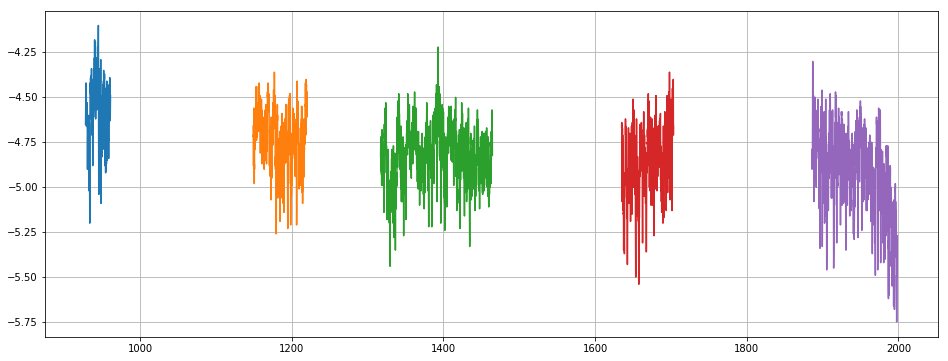

In [4]:
plt.figure(figsize=(16,6))
plt.plot(s5_yy, s5_data_kobb_2003)
plt.plot(s4_yy, s4_data_kobb_2003)
plt.plot(s3_yy, s3_data_kobb_2003)
plt.plot(s2_yy, s2_data_kobb_2003)
plt.plot(s1_yy, s1_data_kobb_2003)
plt.grid()

In [5]:
# Deseason the 5 series
win = 12
s1_yy_ = s1_yy[int(win/2):s1_yy.shape[0]-int(win/2)]
s1_data_kobb_2003_ = np.zeros((s1_data_kobb_2003.shape[0] - win))

s2_yy_ = s2_yy[int(win/2):s2_yy.shape[0]-int(win/2)]
s2_data_kobb_2003_ = np.zeros((s2_data_kobb_2003.shape[0] - win))

s3_yy_ = s3_yy[int(win/2):s3_yy.shape[0]-int(win/2)]
s3_data_kobb_2003_ = np.zeros((s3_data_kobb_2003.shape[0] - win))

s4_yy_ = s4_yy[int(win/2):s4_yy.shape[0]-int(win/2)]
s4_data_kobb_2003_ = np.zeros((s4_data_kobb_2003.shape[0] - win))

s5_yy_ = s5_yy[int(win/2):s5_yy.shape[0]-int(win/2)]
s5_data_kobb_2003_ = np.zeros((s5_data_kobb_2003.shape[0] - win))

for i in range(s1_yy_.shape[0]):
    s1_data_kobb_2003_[i] = s1_data_kobb_2003[i+int(win/2)] - np.mean(s1_data_kobb_2003[i:i+win])
for i in range(s2_yy_.shape[0]):
    s2_data_kobb_2003_[i] = s2_data_kobb_2003[i+int(win/2)] - np.mean(s2_data_kobb_2003[i:i+win])
for i in range(s3_yy_.shape[0]):
    s3_data_kobb_2003_[i] = s3_data_kobb_2003[i+int(win/2)] - np.mean(s3_data_kobb_2003[i:i+win])
for i in range(s4_yy_.shape[0]):
    s4_data_kobb_2003_[i] = s4_data_kobb_2003[i+int(win/2)] - np.mean(s4_data_kobb_2003[i:i+win])
for i in range(s5_yy_.shape[0]):
    s5_data_kobb_2003_[i] = s5_data_kobb_2003[i+int(win/2)] - np.mean(s5_data_kobb_2003[i:i+win])

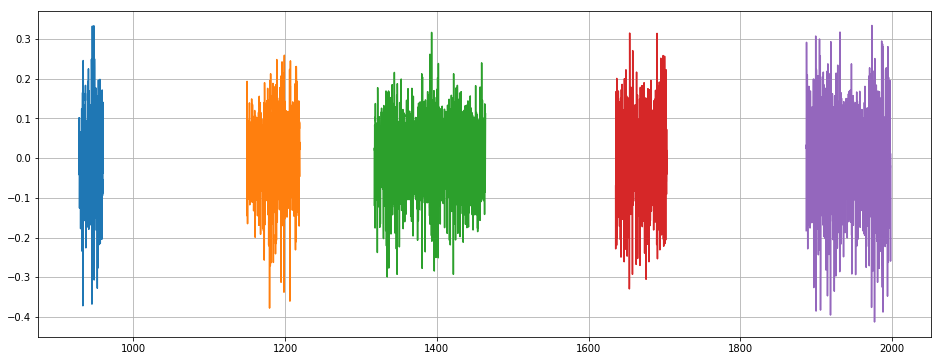

In [6]:
plt.figure(figsize=(16,6))
plt.plot(s5_yy_, s5_data_kobb_2003_)
plt.plot(s4_yy_, s4_data_kobb_2003_)
plt.plot(s3_yy_, s3_data_kobb_2003_)
plt.plot(s2_yy_, s2_data_kobb_2003_)
plt.plot(s1_yy_, s1_data_kobb_2003_)
plt.grid()

In [7]:
from scipy.signal import butter, lfilter


def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band', analog=False)
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y


In [8]:
fs = 1 # 120 data points collected per 10 years
lowcut = 1/84
highcut = 1/24
s1_filt = butter_bandpass_filter(s1_data_kobb_2003_, lowcut, highcut, fs, order=4)
s2_filt = butter_bandpass_filter(s2_data_kobb_2003_, lowcut, highcut, fs, order=4)
s3_filt = butter_bandpass_filter(s3_data_kobb_2003_, lowcut, highcut, fs, order=4)
s4_filt = butter_bandpass_filter(s4_data_kobb_2003_, lowcut, highcut, fs, order=4)
s5_filt = butter_bandpass_filter(s5_data_kobb_2003_, lowcut, highcut, fs, order=4)

# Scale up to original signal values
# An El Niño (La Niña) event is defined by annual-mean δ18O anomalies (computed from the 2–7-yr bandpass filter series, 
# centred on January) that are less than (greater than) -0.11‰ (+ 0.11‰).
#s1_filt = (s1_filt/np.max(np.abs(s1_filt)))*np.max(np.abs(s1_data_kobb_2003_))
#s2_filt = (s2_filt/np.max(np.abs(s2_filt)))*np.max(np.abs(s2_data_kobb_2003_))
#s3_filt = (s3_filt/np.max(np.abs(s3_filt)))*np.max(np.abs(s3_data_kobb_2003_))
#s4_filt = (s4_filt/np.max(np.abs(s4_filt)))*np.max(np.abs(s4_data_kobb_2003_))
#s5_filt = (s5_filt/np.max(np.abs(s5_filt)))*np.max(np.abs(s5_data_kobb_2003_))

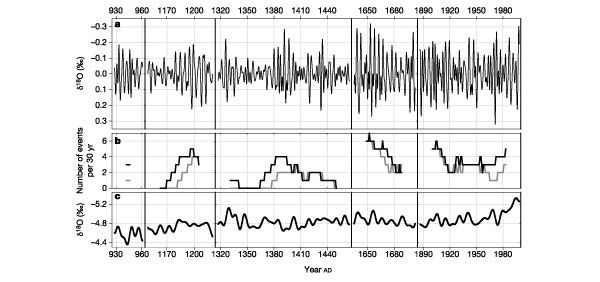
An El Niño (La Niña) event is defined by annual-mean δ18O anomalies (computed from the 2–7-yr bandpass filter series, centred on January) that are less than (greater than) -0.11‰ (+ 0.11‰).

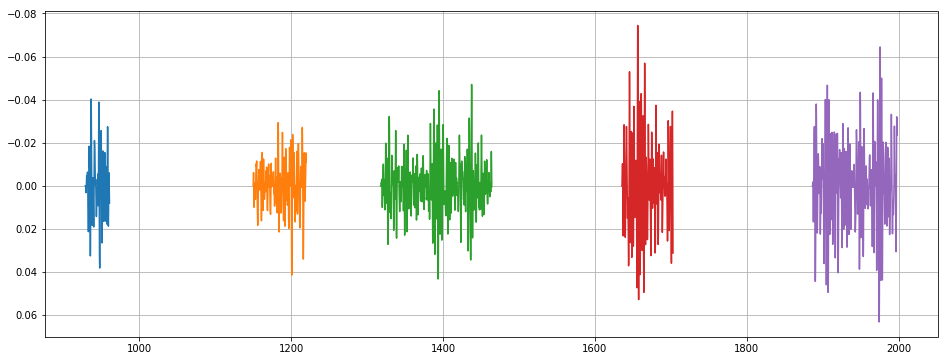

In [9]:
plt.figure(figsize=(16,6))
plt.plot(s5_yy_, s5_filt)
plt.plot(s4_yy_, s4_filt)
plt.plot(s3_yy_, s3_filt)
plt.plot(s2_yy_, s2_filt)
plt.plot(s1_yy_, s1_filt)
plt.gca().invert_yaxis()
plt.grid()

In [10]:
s1_en = np.zeros((s1_filt.shape[0]))
s2_en = np.zeros((s2_filt.shape[0]))
s3_en = np.zeros((s3_filt.shape[0]))
s4_en = np.zeros((s4_filt.shape[0]))
s5_en = np.zeros((s5_filt.shape[0]))

In [11]:
s1_en[s1_filt<-0.11] = 1.0
s2_en[s2_filt<-0.11] = 1.0
s3_en[s3_filt<-0.11] = 1.0
s4_en[s4_filt<-0.11] = 1.0
s5_en[s5_filt<-0.11] = 1.0

In [12]:
s1_start_year = np.round(s1_yy[0])
s1_end_year = np.round(s1_yy[-1])

s2_start_year = np.round(s2_yy[0])
s2_end_year = np.round(s2_yy[-1])

s3_start_year = np.round(s3_yy[0])
s3_end_year = np.round(s3_yy[-1])

s4_start_year = np.round(s4_yy[0])
s4_end_year = np.round(s4_yy[-1])

s5_start_year = np.round(s5_yy[0])
s5_end_year = np.round(s5_yy[-1])

s1_en_yy = np.arange(int(s1_start_year),int(s1_end_year)+1)
s2_en_yy = np.arange(int(s2_start_year),int(s2_end_year)+1)
s3_en_yy = np.arange(int(s3_start_year),int(s3_end_year)+1)
s4_en_yy = np.arange(int(s4_start_year),int(s4_end_year)+1)
s5_en_yy = np.arange(int(s5_start_year),int(s5_end_year)+1)

s1_en_yy_s1 = np.zeros((s1_en_yy.shape[0]))
s2_en_yy_s2 = np.zeros((s2_en_yy.shape[0]))
s3_en_yy_s3 = np.zeros((s3_en_yy.shape[0]))
s4_en_yy_s4 = np.zeros((s4_en_yy.shape[0]))
s5_en_yy_s5 = np.zeros((s5_en_yy.shape[0]))

In [13]:
for i in range(s1_en_yy.shape[0]):
    s_dummy = []
    for j in range(s1_yy_.shape[0]):
        if (s1_en_yy[i]==np.trunc(s1_yy_[j])):
            s_dummy.append(s1_filt[j])
    s_dummy_ = np.asarray(s_dummy)
    s_dummy_en_idx = s_dummy_<-0.11
    if(np.sum(s_dummy_en_idx)>=4):
        s1_en_yy_s1[i] = 1.0
        
for i in range(s2_en_yy.shape[0]):
    s_dummy = []
    for j in range(s2_yy_.shape[0]):
        if (s2_en_yy[i]==np.trunc(s2_yy_[j])):
            s_dummy.append(s2_filt[j])
    s_dummy_ = np.asarray(s_dummy)
    s_dummy_en_idx = s_dummy_<-0.11
    if(np.sum(s_dummy_en_idx)>=4):
        s2_en_yy_s2[i] = 1.0
        
for i in range(s3_en_yy.shape[0]):
    s_dummy = []
    for j in range(s3_yy_.shape[0]):
        if (s3_en_yy[i]==np.trunc(s3_yy_[j])):
            s_dummy.append(s3_filt[j])
    s_dummy_ = np.asarray(s_dummy)
    s_dummy_en_idx = s_dummy_<-0.11
    if(np.sum(s_dummy_en_idx)>=4):
        s3_en_yy_s3[i] = 1.0
        
for i in range(s4_en_yy.shape[0]):
    s_dummy = []
    for j in range(s4_yy_.shape[0]):
        if (s4_en_yy[i]==np.trunc(s4_yy_[j])):
            s_dummy.append(s4_filt[j])
    s_dummy_ = np.asarray(s_dummy)
    s_dummy_en_idx = s_dummy_<-0.11
    if(np.sum(s_dummy_en_idx)>=4):
        s4_en_yy_s4[i] = 1.0
        
for i in range(s5_en_yy.shape[0]):
    s_dummy = []
    for j in range(s5_yy_.shape[0]):
        if (s5_en_yy[i]==np.trunc(s5_yy_[j])):
            s_dummy.append(s5_filt[j])
    s_dummy_ = np.asarray(s_dummy)
    s_dummy_en_idx = s_dummy_<-0.11
    if(np.sum(s_dummy_en_idx)>=4):
        s5_en_yy_s5[i] = 1.0

In [14]:
event_en_kobb = np.concatenate((s5_en_yy_s5, s4_en_yy_s4, s3_en_yy_s3, s2_en_yy_s2, s1_en_yy_s1))
event_yy_kobb = np.concatenate((s5_en_yy, s4_en_yy, s3_en_yy, s2_en_yy, s1_en_yy))

In [15]:
event_yy_volc_all = np.zeros((event_yy_kobb.shape[0]))
event_yy_volc_strong = np.zeros((event_yy_kobb.shape[0]))
event_yy_volc_all_trop = np.zeros((event_yy_kobb.shape[0]))
event_yy_volc_all_nh = np.zeros((event_yy_kobb.shape[0]))
event_yy_volc_all_sh = np.zeros((event_yy_kobb.shape[0]))
event_yy_volc_strong_trop = np.zeros((event_yy_kobb.shape[0]))
event_yy_volc_strong_nh = np.zeros((event_yy_kobb.shape[0]))
event_yy_volc_strong_sh = np.zeros((event_yy_kobb.shape[0]))



for i in range(event_yy_kobb.shape[0]):
    #print(event_yy_kobb[i])
    idx = np.asarray(np.where(volc[:,0] == event_yy_kobb[i]))
    #print(idx.size)
    if idx.size==0:
        continue
    event_yy_volc_all[i] = 1.0
    if np.abs(volc[idx[0,0],2])>=3.7:
        event_yy_volc_strong[i] = 1.0
    
    if volc[idx[0,0],1] == 1.0:
        event_yy_volc_all_trop[i] = 1.0
    if volc[idx[0,0],1] == 2.0:
        event_yy_volc_all_nh[i] = 1.0
    if volc[idx[0,0],1] == 3.0:
        event_yy_volc_all_sh[i] = 1.0
        
    if (volc[idx[0,0],1] == 1.0) & (np.abs(volc[idx[0,0],2])>=3.7):
        event_yy_volc_strong_trop[i] = 1.0
    if (volc[idx[0,0],1] == 2.0) & (np.abs(volc[idx[0,0],2])>=3.7):
        event_yy_volc_strong_nh[i] = 1.0
    if (volc[idx[0,0],1] == 3.0) & (np.abs(volc[idx[0,0],2])>=3.7):
        event_yy_volc_strong_sh[i] = 1.0

In [17]:
np.savetxt('el_nino_kobb_2003.txt', event_en_kobb, delimiter=",")
np.savetxt('all_volc_kobb_2003.txt', event_yy_volc_all, delimiter=",")
np.savetxt('strong_volc_kobb_2003.txt', event_yy_volc_strong, delimiter=",")
np.savetxt('all_tropical_kobb_2003.txt', event_yy_volc_all_trop, delimiter=",")
np.savetxt('strong_tropical_kobb_2003.txt', event_yy_volc_strong_trop, delimiter=",")
np.savetxt('all_nh_kobb_2003.txt', event_yy_volc_all_nh, delimiter=",")
np.savetxt('strong_nh_kobb_2003.txt', event_yy_volc_strong_nh, delimiter=",")
np.savetxt('all_sh_kobb_2003.txt', event_yy_volc_all_sh, delimiter=",")
np.savetxt('strong_sh_kobb_2003.txt', event_yy_volc_strong_sh, delimiter=",")

In [30]:
s5_en_yy_s5

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])